## Setup

In [ ]:
# Install required python packagesspike_recorder_soma
# !pip install -r ../requirements.txt

## Imports

In [1]:
import sys
import os 
import warnings
import numpy as np

pkg_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(pkg_path)

np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
warnings.filterwarnings(action='ignore', category=UserWarning)

import shtmbss2.addsrc
from shtmbss2.common.config import *
from shtmbss2.core.logging import log

Could not load module 'colorlog'. Continuing logging without colored formatter.


In [2]:
RuntimeConfig.backend = Backends.BRAIN_SCALES_2

In [3]:
shtm = None
if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    import shtmbss2.brainscales2.patches
    from shtmbss2.brainscales2.hardware import hardware_initialization
    from shtmbss2.brainscales2.network import SHTMTotal
    # TODO: remove once grenade supports dense inter-population-view projections
    neuronPermutation = []
    shtm = SHTMTotal(use_on_chip_plasticity=True)
    alphabet_size = shtm.p.Network.num_symbols
    num_neurons_per_symbol = shtm.p.Network.num_neurons
    for a in range(alphabet_size):
        # dendrites
        for i in range(num_neurons_per_symbol):
            neuronPermutation.append((a * num_neurons_per_symbol + i) * 2)
    for a in range(alphabet_size):
        # somas
        for i in range(num_neurons_per_symbol):
            neuronPermutation.append((a * num_neurons_per_symbol + i) * 2 + 1)
    for i in range(alphabet_size * num_neurons_per_symbol * 2, 512):
        neuronPermutation.append(i)

    hardware_initialization(neuronPermutation=neuronPermutation)
elif RuntimeConfig.backend == Backends.NEST:
    from shtmbss2.nest.network import SHTMTotal
    
from shtmbss2.common.network import NeuronType, RecTypes

INFO  08:40:52,867  demo_helpers Using setup hxcube7fpga0chip57_1


## Configuration

In [4]:
# pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)
# log.handlers[LogHandler.STREAM].setLevel(logging.DEBUG)

debug = False

experiment_num = None

## Network Initialization

In [5]:
if shtm is None:
    shtm = SHTMTotal()

# FIXME: the timer only starts at start_time + period, fake calculation
# to get exactly one execution at the end of each runtime
runtime=0.
shtm.init_plasticity_rule()
shtm.init_neurons()
shtm.init_connections(debug=debug)
shtm.init_external_input()

if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    shtm.init_rec_exc()
    
shtm.experiment_num = experiment_num

Starting preprocessing/calibration...


In [6]:
#shtm = SHTMTotal.load_full_state(SHTMTotal, "test", 12)


## Network Emulation & Plotting

In [ ]:
#import pynn_brainscales.brainscales2 as pynn
#pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)
shtm.run(steps=30, plasticity_enabled=False)

Running emulation step 1/30
Computing performance for 2 Sequences.
Running emulation step 2/30
Computing performance for 2 Sequences.
Running emulation step 3/30
Computing performance for 2 Sequences.
Running emulation step 4/30
Computing performance for 2 Sequences.
Running emulation step 5/30
Computing performance for 2 Sequences.
Running emulation step 6/30
Computing performance for 2 Sequences.
Running emulation step 7/30
Computing performance for 2 Sequences.
Running emulation step 8/30
Computing performance for 2 Sequences.
Running emulation step 9/30
Computing performance for 2 Sequences.
Running emulation step 10/30
Computing performance for 2 Sequences.
Running emulation step 11/30
Computing performance for 2 Sequences.
Running emulation step 12/30
Computing performance for 2 Sequences.
Running emulation step 13/30
Computing performance for 2 Sequences.
Running emulation step 14/30
Computing performance for 2 Sequences.
Running emulation step 15/30
Computing performance for 2 

In [ ]:
%matplotlib inline
shtm.plot_data_overview()

In [ ]:
shtm.con_plastic[0].permanences[0]

In [ ]:
%matplotlib inline
# somehow takes way too long
shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
%matplotlib inline

run = 40

shtm.plot_events(neuron_types="all", size=(24, 10), 
            window="final", 
            x_lim_lower=run*(shtm.p.Experiment.runtime / 200), x_lim_upper=(run+1)*(shtm.p.Experiment.runtime / 200)
           )

In [ ]:
%matplotlib inline

shtm.plot_performance(StatisticalMetrics.MEAN)

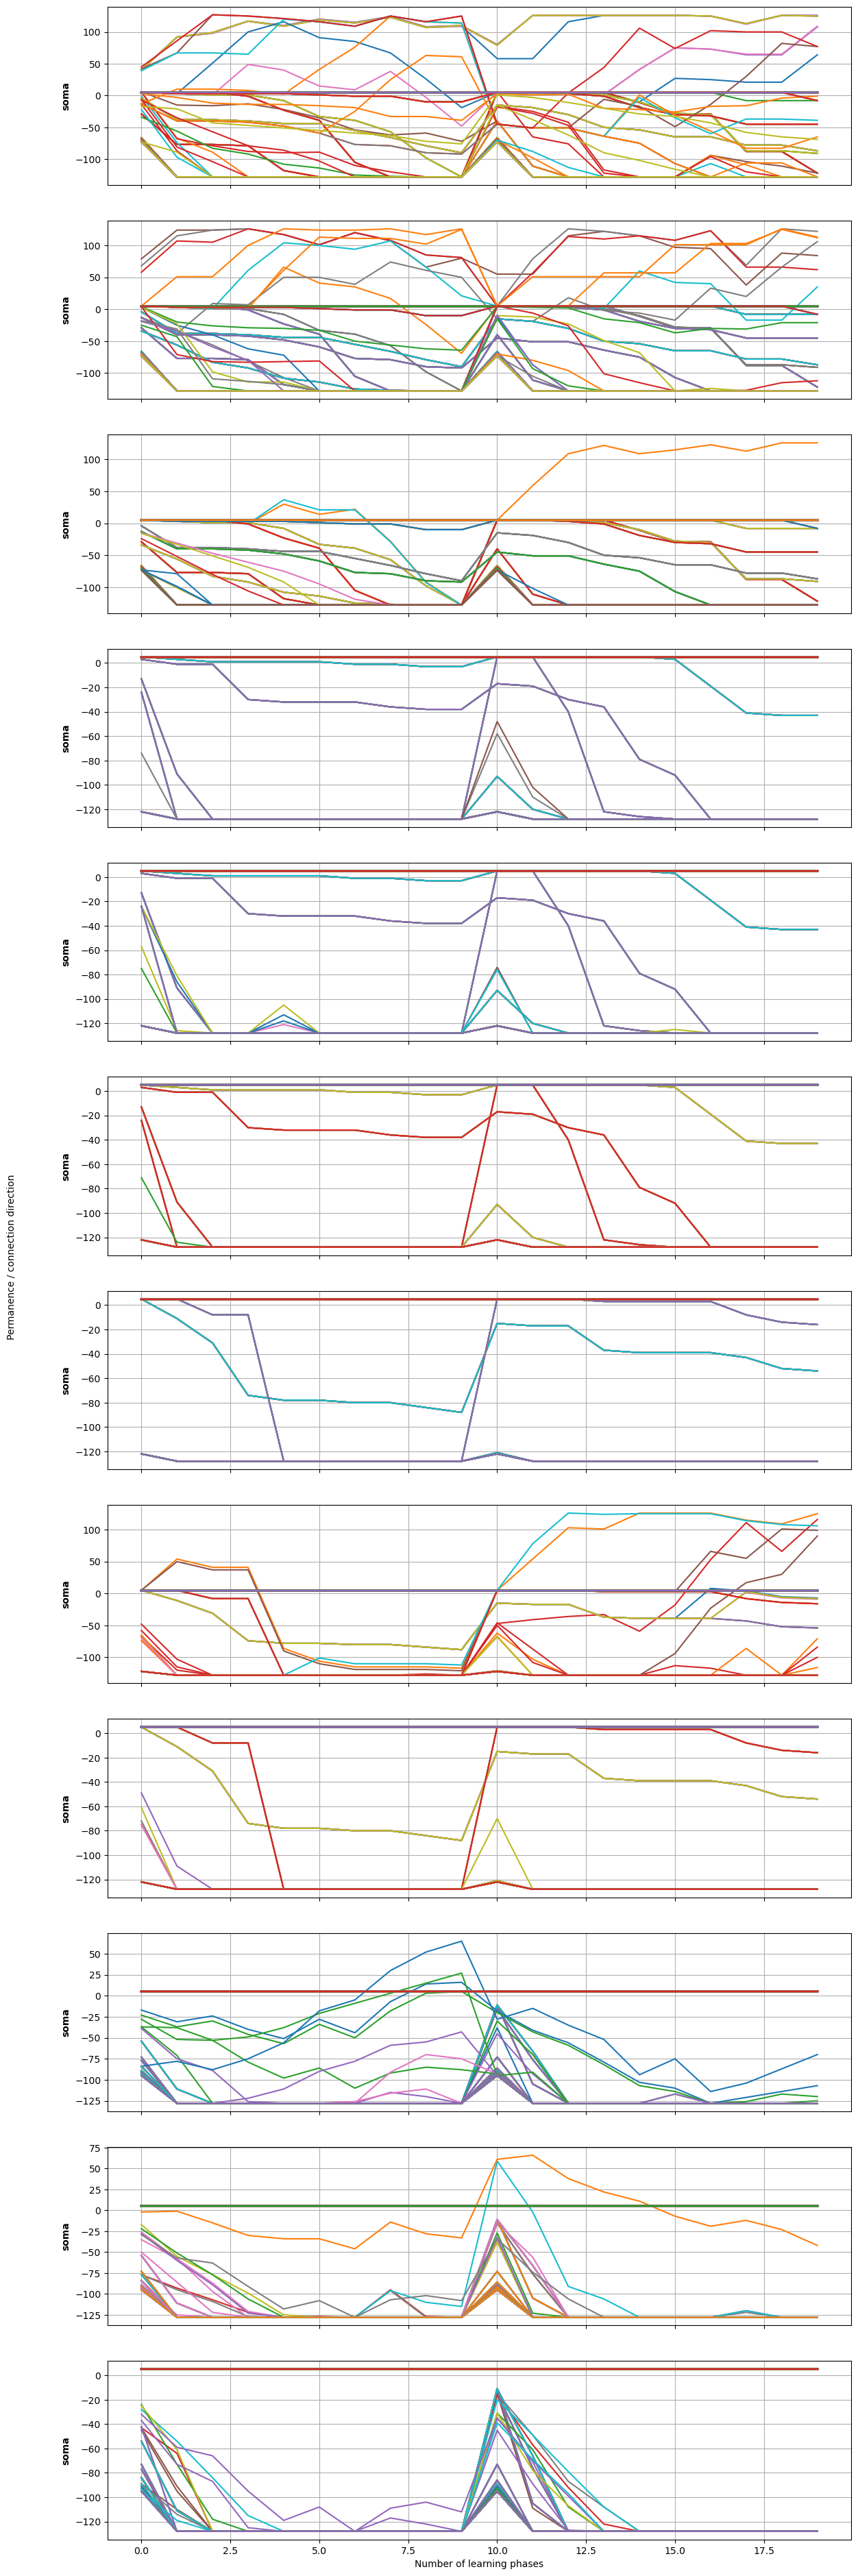

In [15]:
%matplotlib inline

shtm.plot_permanence_history(plot_con_ids="all")

In [ ]:
# shtm.save_full_state()

## Dendrite wrong spike analysis

In [74]:
spikes_dend = shtm.neuron_events[NeuronType.Dendrite][0]
spikes_dend = spikes_dend

# np.array(np.array([arr for arr in spikes_dend]))
# np.array([arr.tolist() for arr in spikes_dend])
spikes_dend[10]

array([  0.018632,   1.25852 ,   1.878496,   2.498496,   4.358488,   5.59852 ,   6.83856 ,   8.078432,   8.698608,  10.558552,  11.178608,  12.418904,  13.657928,  14.898576,  15.518056,  16.13844 ,  17.37848 ,  17.998888,  18.618456,  19.858488,  20.478448,  21.09812 ,  31.65832 ,  32.258712,  32.897704,  33.498712,  34.137776,  34.738712,  35.377568,  35.998264,  36.61772 ,  37.23812 ,  37.857744,  38.47776 ,  39.098216,  39.718216,  40.318536,  41.558592,  42.198176,  42.798576,  43.437816,  44.03868 ,  44.658672,  45.278544,  45.918288,  46.538344,  47.15816 ,  47.778096,  48.99856 ,  49.63812 ,  50.257592,  50.878128,  51.49816 ,  52.098576,  52.737648,  53.358104,  53.978064,  54.578608,  55.217648,  55.83764 ,  56.458096,  57.05852 ,  57.698104,  58.918528,  59.538576,  60.17832 ,  60.798176,  61.418248,  62.037648,  62.638432,  63.258512,  63.898152,  65.757768,  68.218648,  70.717784,  73.198112,  75.677624,  80.638128,  82.49764 ,  84.97824 ,  87.458264,  89.93776 ,  92.39857

In [ ]:
shtm.con_plastic[9].x[-1].reshape(15, 15)

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)
spikes = spikes.reshape((60, 60))

# spike_sum = np.sum(spikes, axis=0)
spike_sum = np.max(spikes, axis=0)

plt.plot(spike_sum)

In [14]:
permanences = np.array(shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data).flatten()
permanences = permanences.reshape((60, 60))


In [20]:
shtm.con_plastic[0].permanences[-1]

array([   5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -118,    5, -118,    5, -128,    5, -128,    5, -118,    5, -120,    5, -119,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,  -81,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5, -128,    5,    

In [21]:
symbol_id=0
neuron_id=10
neuron_type=NeuronType.Dendrite
# runtime=shtm.p.Experiment.runtime / shtm.p.Encoding.num_repetitions * 10 + shtm.p.Encoding.t_exc_start  
runtime=shtm.p.Experiment.runtime
show_legend=False

shtm.reset()

shtm.reset_rec_exc()
shtm.init_rec_exc(alphabet_id=symbol_id, neuron_id=neuron_id, neuron_type=neuron_type)
shtm.run_sim(runtime)

data = shtm.rec_neurons_exc.get_data("v").segments[-1].irregularlysampledsignals

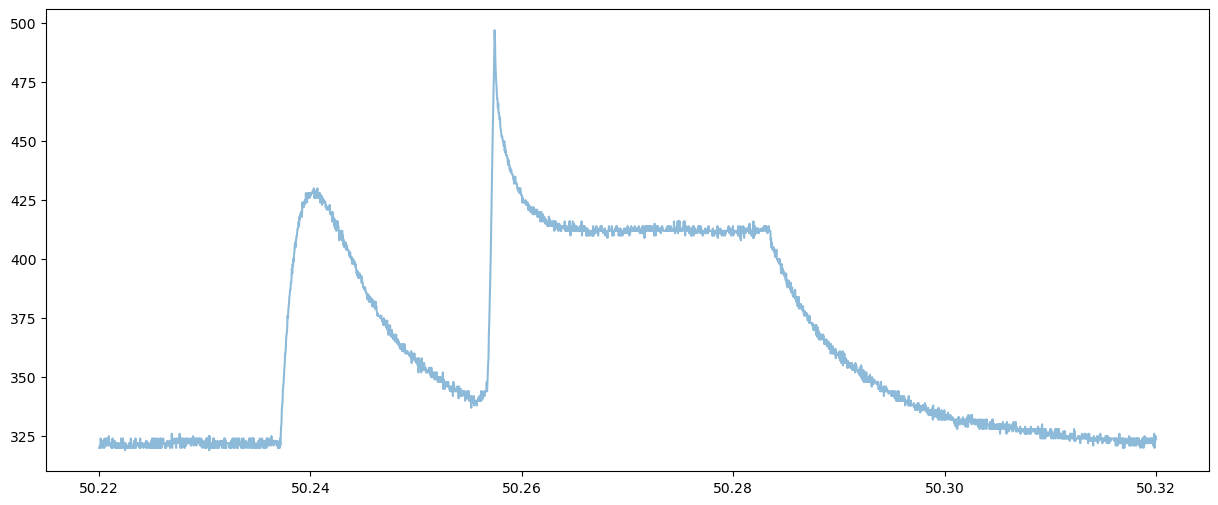

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt

run = 40

x_lim_lower=run*(shtm.p.Experiment.runtime / shtm.p.Encoding.num_repetitions)
x_lim_upper=(run+1)*(shtm.p.Experiment.runtime / shtm.p.Encoding.num_repetitions)

x_lim_lower = 50.22
x_lim_upper = 50.32

lim_low = np.argmax(data[0].times > x_lim_lower)
lim_up = np.argmax(data[0].times > x_lim_upper)

# lim_up = len(data[0].times)

plt.figure(figsize=(15,6))
plt.plot(data[0].times[lim_low:lim_up], data[0][lim_low:lim_up], alpha=0.5)

In [68]:
spikes_dend = shtm.get_neuron_data(NeuronType.Dendrite, symbol_id=0, neuron_id=10, dtype=np.ndarray)
print(spikes_dend[spikes_dend[:, 1], 1])

[  0.01844    0.637712   1.25844    1.877864   2.497848   3.117704   3.737712   4.357776   4.977848   5.597736   6.217712   6.837632   7.458536   8.077872   8.697808   9.31768   10.557896  11.17792   11.797744  12.418408  13.037968  13.6578    14.277936  14.898544  15.517704  16.137976  16.757968  17.378464  17.998496  18.617888  19.237776  19.857976  20.477752  21.0978    21.717936  22.958488  23.577952  24.198608  24.818496  31.638584  32.25856   32.878736  33.498528  34.118648  34.7386    35.358544  35.997552  36.598544  37.23744   37.857552  38.458544  39.078544  39.69864   40.3186    40.938648  41.55864   42.19748   42.798608  43.418624  44.038592  44.658656  45.278576  45.898488  46.5186    47.138568  47.758616  48.378512  48.998488  49.618512  50.257368  50.858656  51.47864   52.098656  52.718592  53.3386    53.958616  54.578568  55.1986    55.818544  56.438584  57.077512  57.678592  58.298632  58.918664  59.538544  60.158576  60.778592  61.398576  62.037312  62.638624  63.25856

In [73]:
shtm.p.Encoding.t_exc_start + runtime/200*40 + shtm.p.Encoding.dt_stm * 2 + shtm.p.Encoding.dt_seq

50.255000000000024

248.00000000000014 49.60000000000002 50.840000000000025


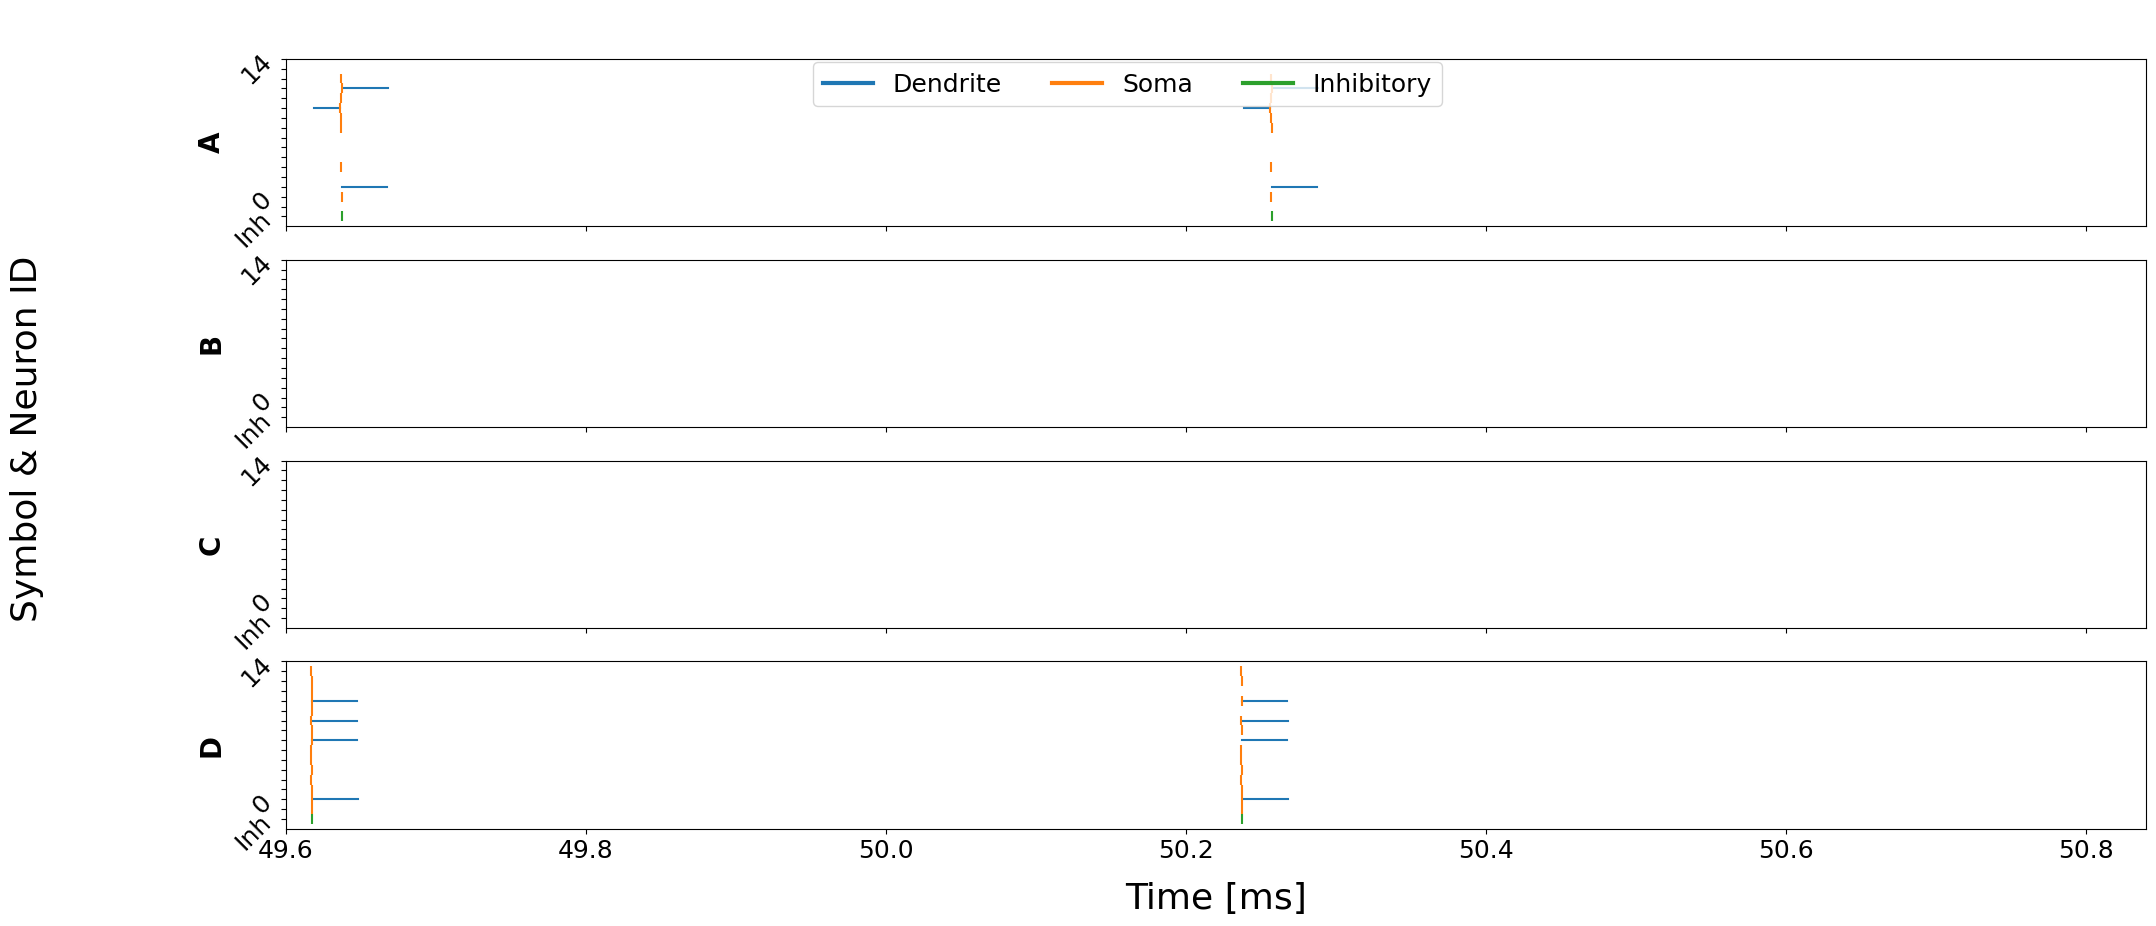

In [57]:
%matplotlib inline

run = 40

plot_events(shtm, neuron_types="all", size=(24, 10), 
            window="final", 
            x_lim_lower=run*(shtm.p.Experiment.runtime / 200), x_lim_upper=(run+1)*(shtm.p.Experiment.runtime / 200)
           )

## Second run

In [ ]:
shtm.run(steps=10, plasticity_enabled=True)

In [ ]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
%matplotlib inline

shtm.plot_performance()

In [ ]:
shtm.run(steps=10, plasticity_enabled=True)

In [ ]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
shtm.set_weights_exc_exc(10, 1, post_ids=[3,4,5], p_con=1.0)
shtm.run(steps=1, plasticity_enabled=True)

# %matplotlib inline
# shtm.plot_events(neuron_types="all", size=(24, 10))

## Additional Plotting

In [ ]:
%matplotlib inline

shtm.plot_permanence_diff()

In [ ]:
%matplotlib inline

# for i in [0, 1]:
#     print(shtm.con_plastic[i].permanences)

shtm.plot_permanence_history(plot_con_ids=[0, 1, 7])

In [ ]:
%matplotlib inline
from shtmbss2.common.network import NeuronType, RecTypes

shtm.plot_v_exc(alphabet_range=[2], neuron_range="all", neuron_type=NeuronType.Soma)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=[0], neuron_range='all', neuron_type=NeuronType.Dendrite, runtime=runtime, show_legend=False)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=range(1, alphabet_size))

## Additional Analysis

In [ ]:
for i in range(len(shtm.con_plastic)):
    shtm.con_plastic[i].mature_weight = 120
    print(i, shtm.con_plastic[i].projection.label.split('_')[1], shtm.con_plastic[i].get_all_connection_ids())
    

In [ ]:
arr = np.array(shtm.con_plastic[1].permanences)

In [ ]:
for c in shtm.con_plastic[1].projection.connections:
    print(f'C[{c.presynaptic_index}, {c.postsynaptic_index}].weight = {c.weight}')

In [ ]:
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
shtm.con_plastic[1].projection.get("weight", format="array")

In [ ]:
shtm.con_plastic[7].projection.get("weight", format="array")

In [ ]:
# Print spikes form spiketrain
for s in shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains:
    print(s)
print(len(shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains))
print(len(shtm.con_plastic[1].projection.connections))

In [ ]:
for con in shtm.con_plastic:
    print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

In [ ]:
dendrites, somas = shtm.get_spike_times(0.44, 0.1e-2)

print(somas)

In [ ]:
for i_plastic in range(len(shtm.con_plastic)):
    shtm.con_plastic[i_plastic].lambda_plus *= 2
    shtm.con_plastic[i_plastic].lambda_minus *= 2
    shtm.con_plastic[i_plastic].lambda_h *= 2
    
    # print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

## Check indices

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

print(somas.all_cells)
print(somas.id_to_index(13))

print(somas.get_data("spikes").segments[-1].spiketrains[8])
print(shtm.con_plastic[0].projection.pre.get_data("spikes").segments[-1].spiketrains[8])

## Check spikes

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

spike_ids_a = list()
spike_ids_b = list()

# Print spikes form spiketrain
for s in somas.get_data("spikes").segments[-1].spiketrains:
    print(s)
    if len(s) > 0:
        print(s[0]/0.1e-3)
        spike_ids_a.append(int(s[0]/0.1e3))

    # for t in np.linspace(0., runtime, int(runtime / 0.1e-3)):
        
    
print(len(somas.get_data("spikes").segments[-1].spiketrains))



In [ ]:
print(shtm.neurons_exc[0][0].get("tau_m"))
print(shtm.neurons_inh[0].tau_m)
w = shtm.exc_to_inh[1].get("weight", format="array")
print(w)
print(pynn.get_current_time())

## Save objects

In [ ]:
import pickle

experiment_name = "shtm_off-chip_01"

with open(f'../evaluation/objects/{experiment_name}.pkl', 'wb') as out_file:
    pickle.dump(shtm, out_file)

In [ ]:
with open(f'../evaluation/objects/{experiment_name}.pkl', 'rb') as in_file:
    obj = pickle.load(in_file)

## Plotting - Events - All Symbols

In [ ]:
%matplotlib inline

seq = 2

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"

file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"

# file_path += "_a"

if seq == 1:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)
elif seq == 2:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, fig_title=fig_title, file_path=file_path)
    


## Plotting - Events - One Symbol

In [ ]:
%matplotlib inline

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"

# file_path += "_a"

fig = shtm.plot_events(shtm, neuron_types="all", symbols=[2], size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)


spikes = shtm.neurons_exc[2][1].get_data("spikes").segments[-1].spiketrains

In [ ]:
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_wo-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"
file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_wo-inh"

figx = pickle.load(open(f'{file_path_open}.fig.pickle', 'rb'))
figx.set_size_inches(12, 6)

figx.legends = []
figx.suptitle("")
figx.subplots_adjust(top=0.85)
neuron_types = [NeuronType.Dendrite, NeuronType.Soma, NeuronType.Inhibitory]
custom_lines = [Line2D([0], [0], color=f"C{n.ID}", label=n.NAME.capitalize(), lw=3) for n in neuron_types]
plt.figlegend(handles=custom_lines, loc=(0.402, 0.888), ncol=3, labelspacing=0., fontsize=18, fancybox=True, borderaxespad=1)


# figx.show()

figx.savefig(f"{file_path_open}.pdf", bbox_inches='tight')
# figx.savefig(f"{file_path_open}.png")

## Final Plots - Voltage

In [ ]:
%matplotlib inline

# plt.rcParams.update({'font.size': 12})

seq = 2

# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"

# file_path += "_a"

# if seq == 1:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, file_path=file_path)
# elif seq == 2:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, file_path=file_path)

shtm.plot_v_exc(shtm, [2], neuron_range="all", size=[12, 10], runtime=0.14, file_path=file_path)

    
